## 인공지능 팀 프로젝트

### 주제 : CNN을 사용해서 아홉 가지 마블 히어로 이미지 분류하기

(캡틴마블, 로키, 로켓라쿤, 블랙펜서, 타노스, 헐크, 아이언맨, 네뷸라, 그루트)

#### 팀원 : 왕수련, 윤정인, 임아연, 함서윤, 정주현

In [7]:
# 1. 구글 드라이브 연동

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# 2. zip 파일 압축 풀기

import zipfile
with zipfile.ZipFile('/content/drive/My Drive/MARVEL/data_set.zip', 'r') as zip_ref: 
  zip_ref.extractall('/content/drive/My Drive/MARVEL')

In [9]:
# 3. Data set 불러오기 & labeling

from tensorflow import keras

# training set (hasn't applied data augmentation yet)
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/MARVEL/data_set/train',
    target_size = (90, 90),
    batch_size=5,
    class_mode='categorical')

# test set
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/My Drive/MARVEL/data_set/test',
    target_size = (90, 90),
    batch_size=5,
    class_mode = 'categorical')

print(train_generator.image_shape)
print(train_generator.class_indices)


Found 405 images belonging to 6 classes.
Found 95 images belonging to 6 classes.
(90, 90, 3)
{'black panther': 0, 'captain marvel': 1, 'hulk': 2, 'locki': 3, 'rocket raccoon': 4, 'thanos': 5}


In [10]:
# 4. 모델 구성

from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

# model creation
model = keras.Sequential()

# CNN layers
model.add(Conv2D(32, (3,3), input_shape= train_generator.image_shape,
                              activation = 'relu', padding='same'))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flattening
model.add(Flatten())

# MLP layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
# output layer
model.add(Dense(6, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 90, 90, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 45, 45, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 22, 22, 64)       

In [11]:
# 5. 모델 컴파일

model.compile(optimizer = 'sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# 7. 모델 훈련

epochs = 60

history = model.fit(train_generator, epochs = epochs,
                    steps_per_epoch = 81,
                    validation_data = test_generator,
                    validation_steps=19)

Epoch 1/60
81/81 [==============================] - 3s 29ms/step - loss: 1.7915 - accuracy: 0.1827 - val_loss: 1.7881 - val_accuracy: 0.1579
Epoch 2/60
81/81 [==============================] - 2s 30ms/step - loss: 1.7880 - accuracy: 0.1778 - val_loss: 1.7848 - val_accuracy: 0.1579
Epoch 3/60
81/81 [==============================] - 2s 28ms/step - loss: 1.7796 - accuracy: 0.2247 - val_loss: 1.7603 - val_accuracy: 0.2316
Epoch 4/60
81/81 [==============================] - 2s 26ms/step - loss: 1.7510 - accuracy: 0.2716 - val_loss: 1.7045 - val_accuracy: 0.3895
Epoch 5/60
81/81 [==============================] - 2s 27ms/step - loss: 1.7115 - accuracy: 0.2864 - val_loss: 1.5631 - val_accuracy: 0.4842
Epoch 6/60
81/81 [==============================] - 2s 25ms/step - loss: 1.5769 - accuracy: 0.4049 - val_loss: 1.4482 - val_accuracy: 0.5684
Epoch 7/60
81/81 [==============================] - 2s 26ms/step - loss: 1.4107 - accuracy: 0.4889 - val_loss: 1.4422 - val_accuracy: 0.4421
Epoch 8/60
81

In [13]:
# 8. 모델 평가

model_loss, model_acc = model.evaluate(test_generator, steps=1)
print(model_loss)
print(model_acc)

1/1 [==============================] - 0s 48ms/step - loss: 2.4585 - accuracy: 0.6000
2.4585108757019043
0.6000000238418579


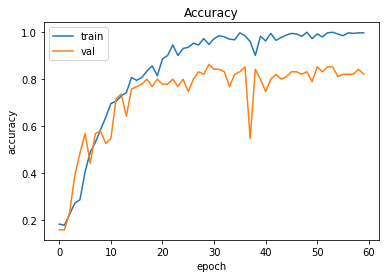

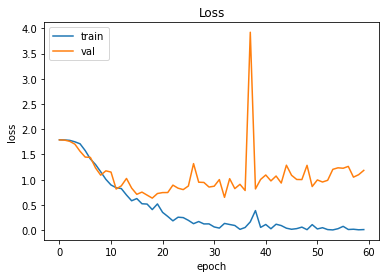

In [14]:
# 9. 학습 시각화하기

import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

In [15]:
test_generator_2 = test_datagen.flow_from_directory(
    '/content/drive/My Drive/MARVEL/data_set/test',
    target_size = (90, 90),
    batch_size=1,
    class_mode = 'categorical')

Found 95 images belonging to 6 classes.


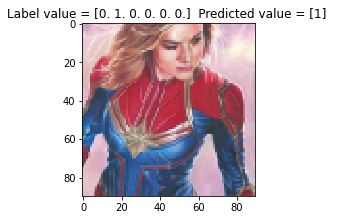

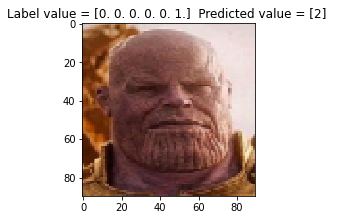

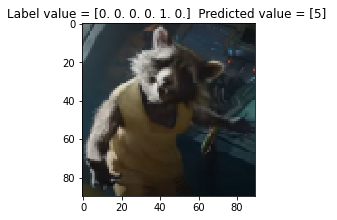

In [16]:
# 이미지를 랜덤으로 3개 뽑아 예측

import numpy as np
for index in np.random.choice(len(test_generator), 3, replace = False):
    test_image = test_generator_2[index][0].reshape(1, 90, 90, 3)
    predicted = model.predict(test_image)
    label = test_generator_2[index][1][0]
    result_label = np.where(label == np.amax(label))
    result_predicted = np.where(predicted == np.amax(predicted))
    title = "Label value = %s  Predicted value = %s " % (label, result_predicted[1])
    
    fig = plt.figure(1, figsize = (3,3))
    ax1 = fig.add_axes((0,0,.8,.8))
    ax1.set_title(title)
    images = test_generator_2
    plt.imshow(images[index][0].squeeze(), interpolation = 'nearest')
    plt.show()